Лаба 4

Под объемом торгов принято понимать количество всех совершенных за определенный период времени сделок на рынке. 

In [2]:
#Импорт библиотек(все уже есть в анаконде) 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
sns.set(color_codes=True)

In [3]:
#Задание 1 
#Чтение csv-файла в датафрейм(таблица)
stocks=pd.read_csv('csv/akcii.csv')
#Приведение даты к datetime
stocks['Date']=pd.to_datetime(stocks['Date'])
#Выделяем кризисы в заданном промежутке(1929,1987,2008,2020)
#маска для определенного промежутка времени
start= datetime.datetime(day=1,month=1,year=1929)
end= datetime.datetime(day=1,month=1,year=1930)
mask= (stocks['Date'] >= start) & (stocks['Date'] <= end)
cris29=stocks.loc[mask]

start= datetime.datetime(day=1,month=1,year=1987)
end= datetime.datetime(day=1,month=1,year=1988)
mask= (stocks['Date'] >= start) & (stocks['Date'] <= end)
cris87=stocks.loc[mask]


start= datetime.datetime(day=1,month=1,year=2008)
end= datetime.datetime(day=1,month=1,year=2010)
mask= (stocks['Date'] >= start) & (stocks['Date'] <= end)
cris08=stocks.loc[mask]

start= datetime.datetime(day=1,month=1,year=2019)
mask= (stocks['Date'] >= start)
cris20=stocks.loc[mask]




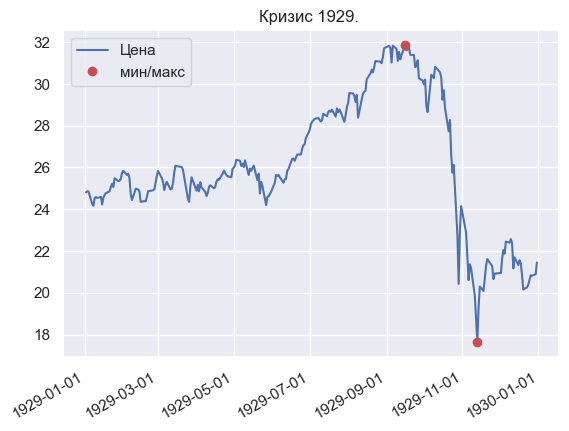

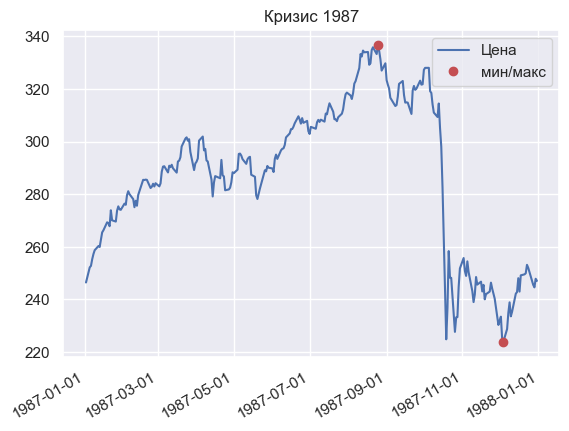

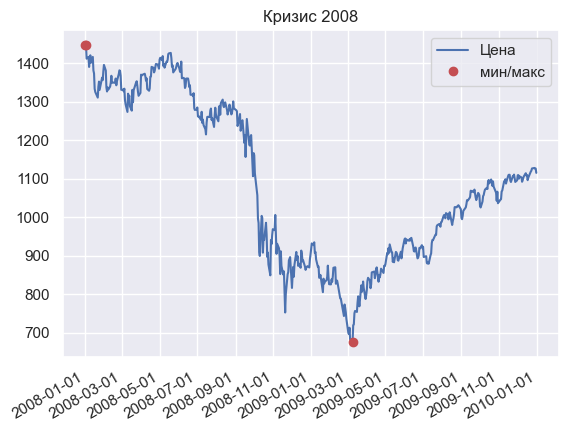

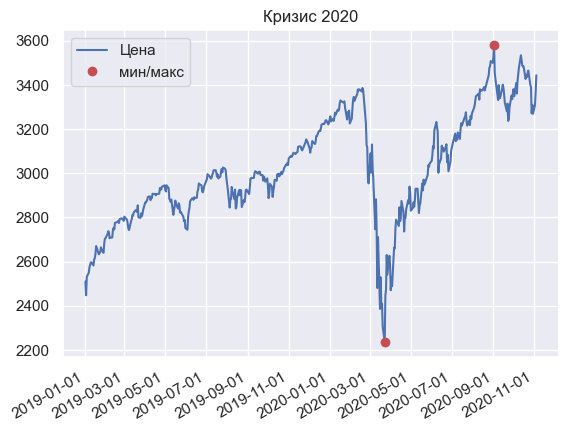

In [4]:
#Графики c пиковыми и минимальными значениями индекса
fig, ax = plt.subplots()
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title('Кризис 1929. ')
ax.plot(cris29['Date'], cris29['Close'],label='Цена')
min_cris29= cris29[cris29.Close==cris29.Close.min()]
max_cris29= cris29[cris29.Close==cris29.Close.max()]
ax.plot(min_cris29['Date'], min_cris29['Close'],'ro',label='мин/макс')
ax.plot(max_cris29['Date'], max_cris29['Close'],'ro')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title('Кризис 1987')
ax.plot(cris87['Date'], cris87['Close'],label='Цена')
min_cris87= cris87[cris87.Close==cris87.Close.min()]
max_cris87= cris87[cris87.Close==cris87.Close.max()]
ax.plot(min_cris87['Date'], min_cris87['Close'],'ro',label='мин/макс')
ax.plot(max_cris87['Date'], max_cris87['Close'],'ro')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title('Кризис 2008')
ax.plot(cris08['Date'], cris08['Close'],label='Цена')
min_cris08= cris08[cris08.Close==cris08.Close.min()]
max_cris08= cris08[cris08.Close==cris08.Close.max()]
ax.plot(min_cris08['Date'], min_cris08['Close'],'ro',label='мин/макс')
ax.plot(max_cris08['Date'], max_cris08['Close'],'ro')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title('Кризис 2020')
ax.plot(cris20['Date'], cris20['Close'],label='Цена')
min_cris20= cris20[cris20.Close==cris20.Close.min()]
max_cris20= cris20[cris20.Close==cris20.Close.max()]
ax.plot(min_cris20['Date'], min_cris20['Close'],'ro',label='мин/макс')
ax.plot(max_cris20['Date'], max_cris20['Close'],'ro')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()



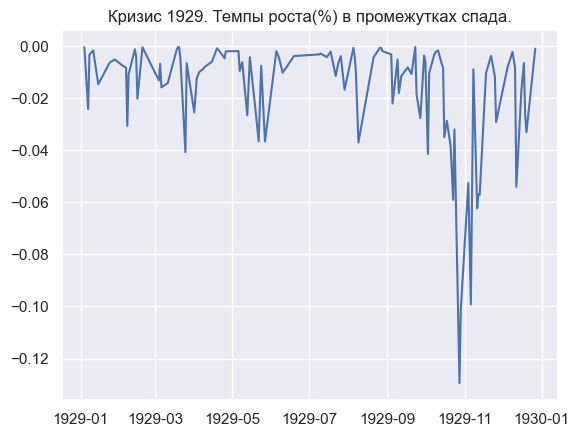

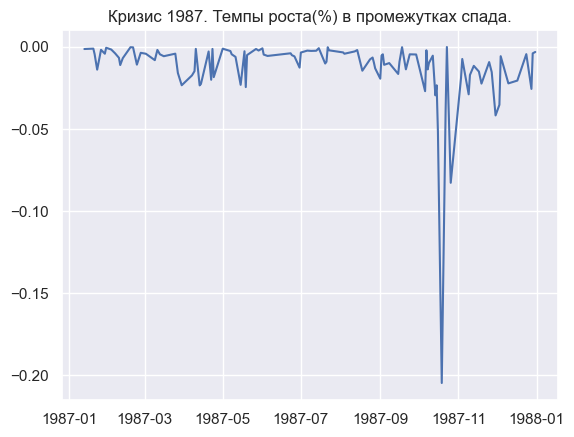

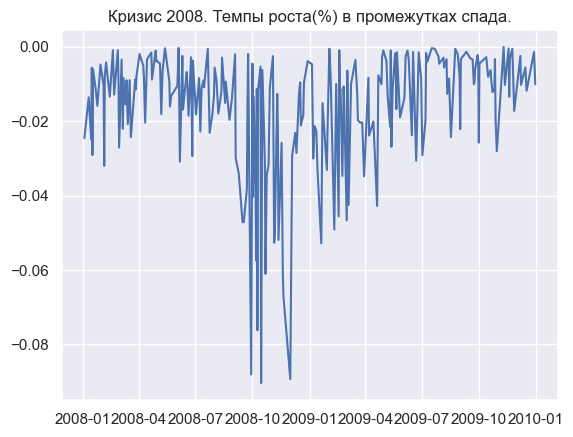

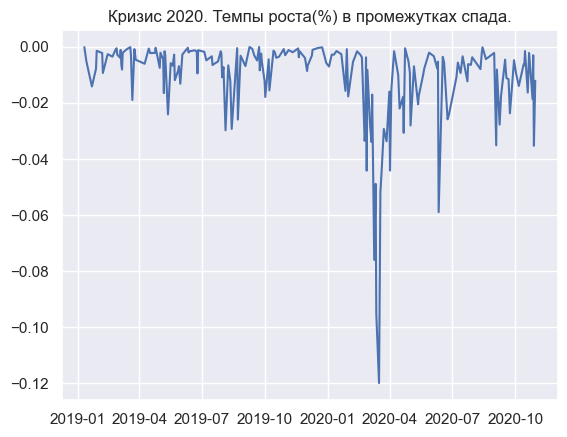

In [7]:
#Определение темпов роста в периоды спада
cris29['Percent'] = cris29.Close.pct_change(periods=1)
cris29.Percent.round(3)
cris29=cris29.dropna()
neg=cris29[cris29.Percent <0]
plt.plot(neg.Date,neg.Percent)
plt.title('Кризис 1929. Темпы роста(%) в промежутках спада.')
plt.show()

cris87['Percent'] = cris87.Close.pct_change(periods=1)
cris87.Percent.round(3)
cris87=cris87.dropna()
neg=cris87[cris87.Percent <0]
plt.plot(neg.Date,neg.Percent)
plt.title('Кризис 1987. Темпы роста(%) в промежутках спада.')
plt.show()

cris08['Percent'] = cris08.Close.pct_change(periods=1)
cris08.Percent.round(3)
cris08=cris08.dropna()
neg=cris08[cris08.Percent <0]
plt.plot(neg.Date,neg.Percent)
plt.title('Кризис 2008. Темпы роста(%) в промежутках спада.')
plt.show()

cris20['Percent'] = cris20.Close.pct_change(periods=1)
cris20.Percent.round(3)
cris20=cris20.dropna()
neg=cris20[cris20.Percent <0]
plt.plot(neg.Date,neg.Percent)
plt.title('Кризис 2020. Темпы роста(%) в промежутках спада.')
plt.show()


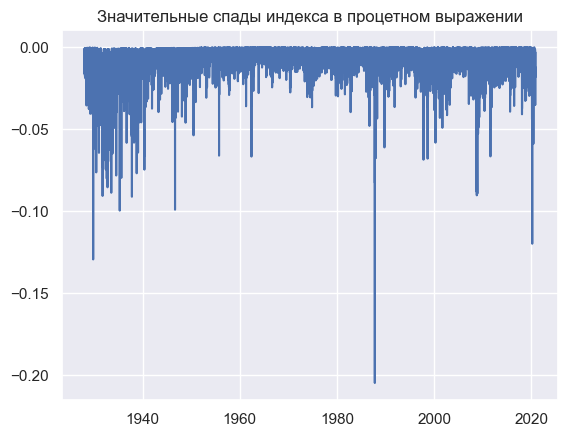

In [6]:
#Выделяем самый значительный спад
stocks['Percent'] = stocks.Close.pct_change(periods=1)
stocks.Percent.round(3)
stocks=stocks.dropna()
neg=stocks[stocks.Percent <0]
plt.plot(neg.Date,neg.Percent)
plt.title('Значительные спады индекса в процетном выражении')
plt.show()

